## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

Experiment with Batch Size = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 12

50000/50000 [==============================] - 131s 3ms/step - loss: 2.1942 - acc: 0.1909 - val_loss: 4.7742 - val_acc: 0.1734
Epoch 50/50
50000/50000 [==============================] - 131s 3ms/step - loss: 2.1947 - acc: 0.1907 - val_loss: 4.9139 - val_acc: 0.1918
Experiment with Batch Size = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None,

50000/50000 [==============================] - 18s 363us/step - loss: 0.5834 - acc: 0.7934 - val_loss: 1.5907 - val_acc: 0.5430
Epoch 48/50
50000/50000 [==============================] - 18s 358us/step - loss: 0.5691 - acc: 0.7967 - val_loss: 1.5686 - val_acc: 0.5492
Epoch 49/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.5681 - acc: 0.7969 - val_loss: 1.5845 - val_acc: 0.5475
Epoch 50/50
50000/50000 [==============================] - 18s 363us/step - loss: 0.5596 - acc: 0.7996 - val_loss: 1.5916 - val_acc: 0.5465
Experiment with Batch Size = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (De

50000/50000 [==============================] - 9s 190us/step - loss: 0.2938 - acc: 0.8943 - val_loss: 2.0004 - val_acc: 0.5458
Epoch 46/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.2851 - acc: 0.8999 - val_loss: 1.9936 - val_acc: 0.5372
Epoch 47/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.2781 - acc: 0.9011 - val_loss: 2.0593 - val_acc: 0.5429
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.2776 - acc: 0.9020 - val_loss: 2.0331 - val_acc: 0.5454
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.2706 - acc: 0.9052 - val_loss: 2.0413 - val_acc: 0.5431
Epoch 50/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.2666 - acc: 0.9052 - val_loss: 2.0935 - val_acc: 0.5417
Experiment with Batch Size = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i

50000/50000 [==============================] - 4s 78us/step - loss: 0.0779 - acc: 0.9776 - val_loss: 2.4909 - val_acc: 0.5213
Epoch 44/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.0794 - acc: 0.9768 - val_loss: 2.5532 - val_acc: 0.5186
Epoch 45/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.0802 - acc: 0.9757 - val_loss: 2.5784 - val_acc: 0.5189
Epoch 46/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.0705 - acc: 0.9800 - val_loss: 2.5977 - val_acc: 0.5187
Epoch 47/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.0669 - acc: 0.9810 - val_loss: 2.6690 - val_acc: 0.5157
Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.0692 - acc: 0.9798 - val_loss: 2.6548 - val_acc: 0.5172
Epoch 49/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.0711 - acc: 0.9785 - val_loss: 2.6370 - val_acc: 0.5199
Epoch 50/50
50000/50000 [=====================

Epoch 42/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0664 - acc: 0.9886 - val_loss: 2.3505 - val_acc: 0.5005
Epoch 43/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0630 - acc: 0.9890 - val_loss: 2.4012 - val_acc: 0.5025
Epoch 44/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0558 - acc: 0.9912 - val_loss: 2.4228 - val_acc: 0.4979
Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.0536 - acc: 0.9911 - val_loss: 2.4369 - val_acc: 0.5027
Epoch 46/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0493 - acc: 0.9926 - val_loss: 2.4567 - val_acc: 0.5053
Epoch 47/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0461 - acc: 0.9930 - val_loss: 2.4927 - val_acc: 0.5014
Epoch 48/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0413 - acc: 0.9947 - val_loss: 2.5201 - val_acc: 0.5021l
Epoch 49/50
50000/50000 [========

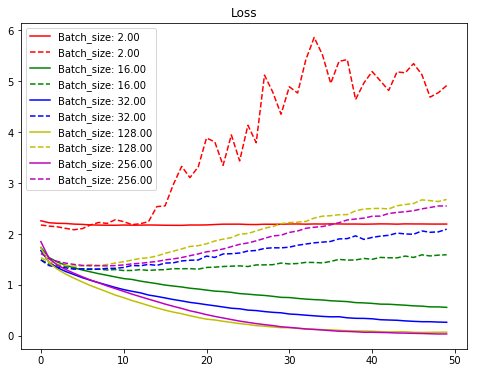

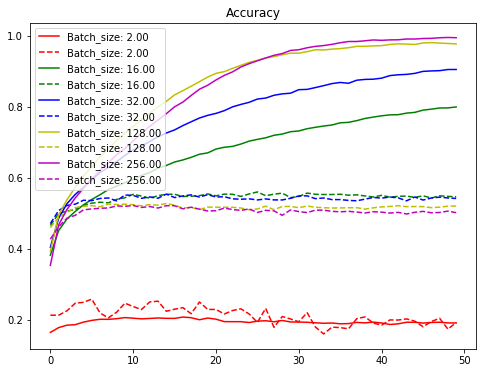

In [5]:
from keras.layers import BatchNormalization

def build_mlp_before(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

# Training
results = {}
for batchsize in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch Size = %.6f" % (batchsize))
    model = build_mlp_before(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batchsize, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag_of_dropout = 'Batch_size: %.2f' % batchsize
    results[name_tag_of_dropout] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with Batch Size = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 1

Epoch 49/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.7952 - acc: 0.7148 - val_loss: 1.5550 - val_acc: 0.5082
Epoch 50/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.7806 - acc: 0.7204 - val_loss: 1.6495 - val_acc: 0.4926
Experiment with Batch Size = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_

50000/50000 [==============================] - 4s 79us/step - loss: 0.3051 - acc: 0.8928 - val_loss: 2.5360 - val_acc: 0.4413
Epoch 48/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.2903 - acc: 0.9012 - val_loss: 2.3713 - val_acc: 0.4583
Epoch 49/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.2839 - acc: 0.9050 - val_loss: 2.5830 - val_acc: 0.4533
Epoch 50/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.2807 - acc: 0.9032 - val_loss: 2.5492 - val_acc: 0.4508
Experiment with Batch Size = 256.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (B

Epoch 46/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.2173 - acc: 0.9358 - val_loss: 2.3939 - val_acc: 0.4643
Epoch 47/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2022 - acc: 0.9432 - val_loss: 2.4197 - val_acc: 0.4648
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.1931 - acc: 0.9450 - val_loss: 2.3638 - val_acc: 0.4680
Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.1831 - acc: 0.9497 - val_loss: 2.5658 - val_acc: 0.4604
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.1799 - acc: 0.9496 - val_loss: 2.5335 - val_acc: 0.4628


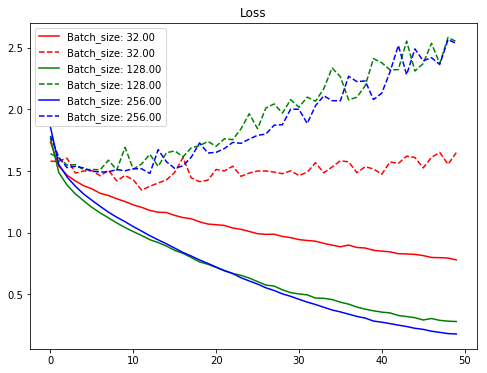

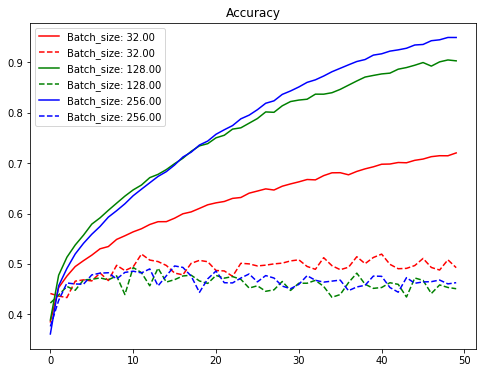

In [6]:
def build_mlp_after(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

# Training
results = {}
for batchsize in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch Size = %.6f" % (batchsize))
    model = build_mlp_after(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batchsize, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag_of_dropout = 'Batch_size: %.2f' % batchsize
    results[name_tag_of_dropout] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()